# Submission for ECON 425 Week 6 Homework Assignment
# Pranov Suresh

## Question 2 - Resampling dataset on credit card fraud utilising SMOTENC, then building a decision tree classifier to predict occurences of fraud

## Q2 - i)

In [1]:
#Importing essential packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTENC
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
#Importing dataset as a Pandas dataframe
credit_card_data = pd.read_csv("E:/UCLA/Winter 2024/ECON 425/card_transdata.csv")
credit_card_data

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [3]:
#Defining variables for operations
fraud = credit_card_data["fraud"]
X = pd.DataFrame(credit_card_data.drop("fraud",axis = 1))
y = pd.DataFrame(fraud)
X

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
0,57.877857,0.311140,1.945940,1,1,0,0
1,10.829943,0.175592,1.294219,1,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1
3,2.247564,5.600044,0.362663,1,1,0,1
4,44.190936,0.566486,2.222767,1,1,0,1
...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1
999998,4.258729,0.242023,0.475822,1,0,0,1


In [7]:
credit_card_data[credit_card_data["fraud"] == 1] 

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
13,2.131956,56.372401,6.358667,1,0,0,1,1
24,3.803057,67.241081,1.872950,1,0,0,1,1
29,15.694986,175.989182,0.855623,1,0,0,1,1
35,26.711462,1.552008,4.603601,1,1,0,1,1
36,10.664474,1.565769,4.886521,1,0,0,1,1
...,...,...,...,...,...,...,...,...
999908,45.296658,0.882736,8.856861,1,0,0,1,1
999916,167.139756,0.282253,0.308468,1,0,0,1,1
999919,124.640118,0.004416,0.434885,1,0,0,1,1
999939,51.412900,3.429330,29.914254,1,0,0,1,1


In [4]:
#Defining variables with test-train splits
X_train = X.iloc[:500000]
y_train = y.iloc[:500000]
X_test = X.iloc[500000:] 
y_test = y.iloc[500000:]

In [5]:
#Generating a range of gamma values for building SMOTENC resampling algorithm
gamma_range = np.round(np.arange(0.1,1.1,0.1), 2)
gamma_range

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [6]:
#Passing through categorical features to SMOTENC, and creating lists to contain results from SMOTE resampling
categories = [3,4,5,6]
smote_results = {}
score_results = pd.DataFrame(columns=["Training Precision", "Training Recall", "Training F1-score", 
                                      "Testing Precision", "Testing Recall", "Testing F1-score"])

In [7]:
#Building a for-loop to iterate over gamma range for different SMOTENC-resampled datasets
for gamma_value in gamma_range:
    smote = SMOTENC(categorical_features=categories, random_state= 36, sampling_strategy=gamma_value)
    smote_x, smote_y = smote.fit_resample(X_train, y_train)
    key = f"SMOTE_{gamma_value}"
    smote_results[key] = (smote_x, smote_y)

## - Q2 - ii)

In [8]:
#Building a for-loop to build a decision tree-classifier for each SMOTENC-resampled dataset
for key, value in smote_results.items():
    smote_x, smote_y = value
    classifier = DecisionTreeClassifier(criterion='entropy') 
    classifier.fit(smote_x, smote_y)
    y_pred_training = classifier.predict(smote_x)
    y_pred_testing = classifier.predict(X_test)
    train_precision = precision_score(smote_y, y_pred_training)
    train_recall = recall_score(smote_y, y_pred_training)
    train_f1 = f1_score(smote_y, y_pred_training)
    test_precision = precision_score(y_test, y_pred_testing)
    test_recall = recall_score(y_test, y_pred_testing)
    test_f1 = f1_score(y_test, y_pred_testing)
    score_results.loc[key] = [train_precision, train_recall, train_f1, 
                              test_precision, test_recall, test_f1]

In [18]:
#Printing the dataframe containing the results
score_results.sort_values("Testing F1-score", axis = 0, ascending = False)

,Training Precision,Training Recall,Training F1-score,Testing Precision,Testing Recall,Testing F1-score
SMOTE_0.1,1.0,1.0,1.0,0.999954,0.999726,0.999840
SMOTE_0.3,1.0,1.0,1.0,0.999657,0.999726,0.999691
SMOTE_0.2,1.0,1.0,1.0,0.999611,0.999726,0.999668
SMOTE_0.4,1.0,1.0,1.0,0.999497,0.999703,0.999600
SMOTE_0.6,1.0,1.0,1.0,0.999200,0.999748,0.999474
SMOTE_0.7,1.0,1.0,1.0,0.999154,0.999703,0.999429
SMOTE_0.5,1.0,1.0,1.0,0.999018,0.999771,0.999394
SMOTE_0.8,1.0,1.0,1.0,0.999017,0.999680,0.999349
SMOTE_1.0,1.0,1.0,1.0,0.998949,0.999634,0.999291
SMOTE_0.9,1.0,1.0,1.0,0.998812,0.999680,0.999246


## Q2 - iii)

In [10]:
#Defining a dictionary to generate training and testing plots
plots_to_plot = {1: ["Training Precision", "Testing Precision"], 2: ["Training Recall", "Testing Recall"], 3: ["Training F1-score", "Testing F1-score"]}

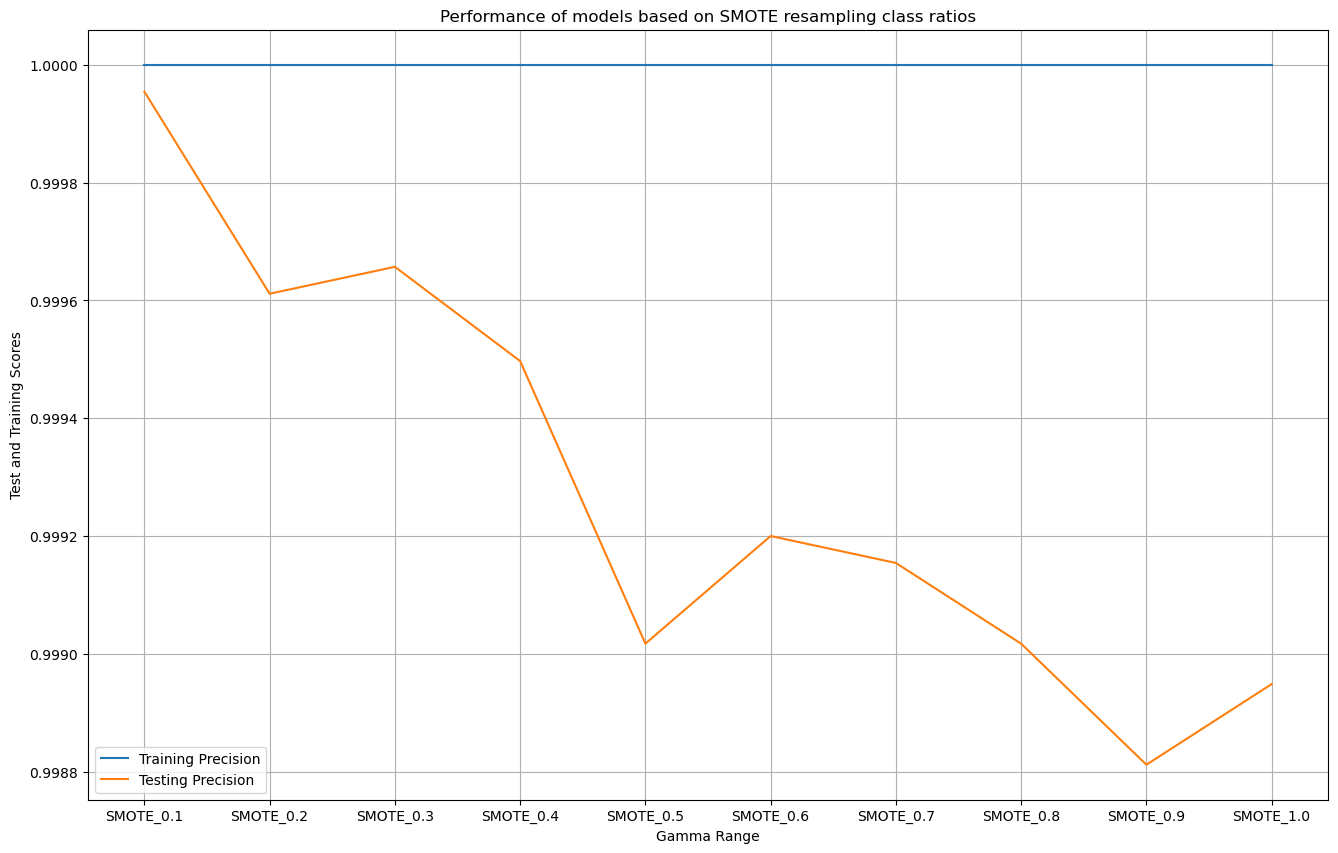

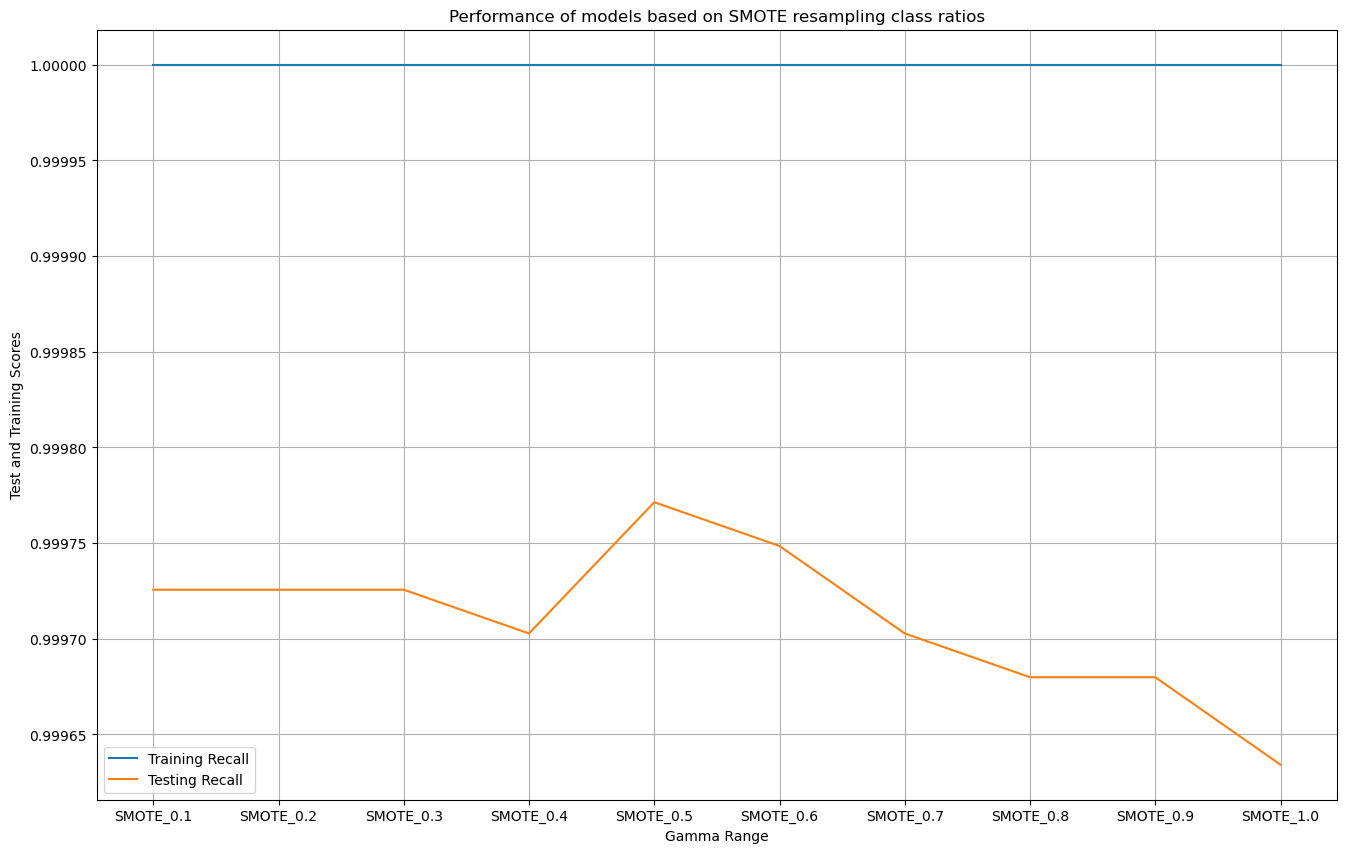

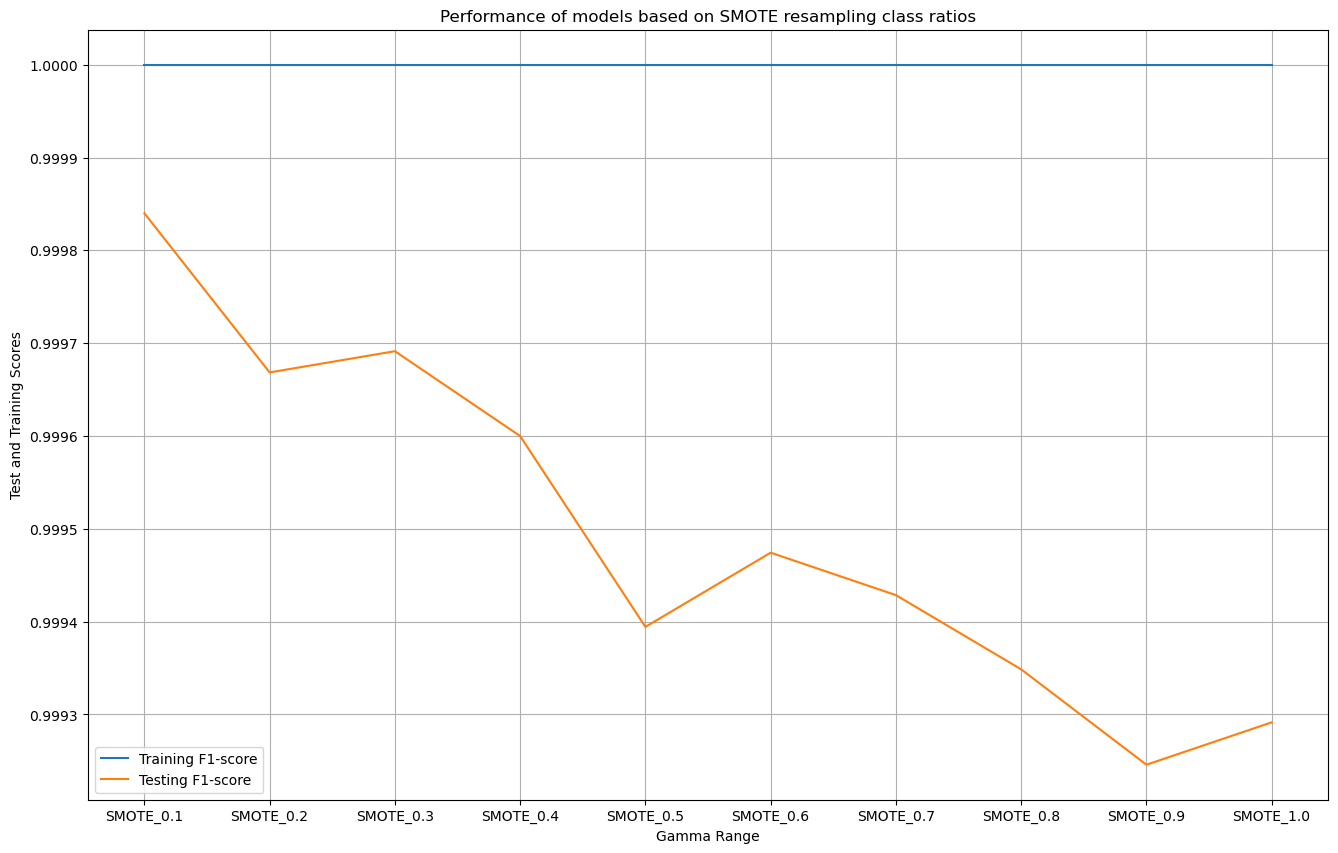

In [11]:
#Builing a for-loop to iterate over the plots_to_plot dictionary to generate plots
for value in plots_to_plot:
    plt.figure(figsize = (16,10))
    plt.plot(score_results.index, score_results[plots_to_plot[value][0]], label=f"{plots_to_plot[value][0]}")
    plt.plot(score_results.index, score_results[plots_to_plot[value][1]], label=f"{plots_to_plot[value][1]}")
    plt.xlabel("Gamma Range")
    plt.ylabel("Test and Training Scores")
    plt.title("Performance of models based on SMOTE resampling class ratios")
    plt.legend()
    plt.grid()
    plt.plot()

In [12]:
#Building a dataframe to store results of the original data
score_results_orig = pd.DataFrame(columns=["Training Precision", "Training Recall", "Training F1-score", 
                                      "Testing Precision", "Testing Recall", "Testing F1-score"])

In [15]:
#Comparing performance of SMOTENC resampled dataset and original dataset
original_ratio = np.sum(fraud)/len(credit_card_data)
classifier_original = DecisionTreeClassifier(criterion='entropy') 
classifier_original.fit(X_train, y_train)
y_pred_training_orig = classifier_original.predict(X_train)
y_pred_testing_orig = classifier_original.predict(X_test)
train_precision_orig = precision_score(y_train, y_pred_training_orig)
train_recall_orig = recall_score(y_train, y_pred_training_orig)
train_f1_orig = f1_score(y_train, y_pred_training_orig)
test_precision_orig = precision_score(y_test, y_pred_testing_orig)
test_recall_orig = recall_score(y_test, y_pred_testing_orig)
test_f1_orig = f1_score(y_test, y_pred_testing_orig)
score_results_orig.loc[len(score_results_orig)] = [train_precision_orig, train_recall_orig, train_f1_orig, 
                              test_precision_orig, test_recall_orig, test_f1_orig]
print("The original ratio between the minority and majority classes in the dataset is", original_ratio)

The original ratio between the minority and majority classes in the dataset is 0.087403


In [16]:
#Printing the results from the original dataset
print("The original dataset returns a Training Precision value of:", score_results_orig["Training Precision"].iloc[0],"\n" 
      "The original dataset returns a Training Recall value of:", score_results_orig["Training Recall"].iloc[0],"\n"
      "The original dataset returns a Training F1-Score of:", score_results_orig["Training F1-score"].iloc[0],"\n"
      "The original dataset returns a Testing Precision value of:", score_results_orig["Testing Precision"].iloc[0],"\n"
      "The original dataset returns a Testing Recall value of:", score_results_orig["Testing Recall"].iloc[0],"\n"
      "The original dataset returns a Testing F1-Score of:", score_results_orig["Testing F1-score"].iloc[0])

The original dataset returns a Training Precision value of: 1.0 
The original dataset returns a Training Recall value of: 1.0 
The original dataset returns a Training F1-Score of: 1.0 
The original dataset returns a Testing Precision value of: 1.0 
The original dataset returns a Testing Recall value of: 0.9997256264861899 
The original dataset returns a Testing F1-Score of: 0.9998627944203065


## Based on the test score returned on the SMOTENC-resampled datasets and the test score from the run on the original dataset, we can see that our original model enjoys a marginally superior testing F-1 score. 

### The original ratio of the minority class to the majority class is 0.0874, which is closest to 0.1 in our artifically resampled class of datasets. 

Thus, it is not surprising to see that the model that ended up having the best testing F1-score was the one trained on a SMOTENC-resampled dataset with 0.1 gamma. The general trend in testing F1-score was that of a consistent downtrend, meaning that as the minority class was enlarged through artifical resampling, the performance of the models kept declining in terms of the performance metrics. 

The best models are all trained on datasets with gammas close to the original ratio itself, indicating that SMOTENC resampling does not aid the performance of the model. For this we turn to the dataframe which is sorted by the testing F1-score, where gamma = 0.1, 0.3, and 0.2 are the top performing models respectively. 

In such a skewed dataset, where there is a very poor ratio between the minority class and the majority class, most classification models tend to be less accurate, and thus F-1 score is a better metric and basis of comparison. 